# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

In [2]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")
print(f"GPUs disponibles: {len(tf.config.list_physical_devices('GPU'))}")
print(f"GPU support: {tf.test.is_gpu_available()}")

2025-07-02 18:09:03.350602: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-02 18:09:03.350671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-02 18:09:03.429084: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-02 18:09:03.588865: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.15.0
GPUs disponibles: 1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU support: True


2025-07-02 18:09:05.920928: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-02 18:09:06.087723: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-02 18:09:06.087956: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()
print(f"PySpark version: {spark.version}")
spark.range(10).show()
spark.stop()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/02 18:09:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


PySpark version: 3.5.0
+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
+---+



In [4]:
import os
import sys

# Verificar variables de entorno importantes
env_vars = ['JAVA_HOME', 'PYSPARK_PYTHON', 'PYSPARK_DRIVER_PYTHON']
for var in env_vars:
    value = os.environ.get(var, 'No configurada')
    print(f"🔧 {var}: {value}")

print(f"🐍 Python version: {sys.version}")


🔧 JAVA_HOME: /usr/lib/jvm/java-11-openjdk-amd64
🔧 PYSPARK_PYTHON: python3
🔧 PYSPARK_DRIVER_PYTHON: python3
🐍 Python version: 3.11.0rc1 (main, Aug 12 2022, 10:02:14) [GCC 11.2.0]


In [5]:
import os
from pathlib import Path

def setup_working_directory():
    """
    Configura el directorio de trabajo automáticamente según la ubicación del notebook.
    """
    try:
        # Esto obtiene la ruta del notebook actual
        notebook_path = Path.cwd()  # Esto funciona en Jupyter
        os.chdir(notebook_path)
        print(f"📁 Cambiado automáticamente a: {notebook_path}")
    except Exception as e:
        print(f"⚠️ Error: {e}")
        print(f"📁 Manteniéndose en: {os.getcwd()}")

# Llama a la función sin parámetros
setup_working_directory()

📁 Cambiado automáticamente a: /tf


In [6]:
os.chdir('/tf/pyspark_exercises/07_Visualization/Chipotle/')


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [7]:
from pyspark.sql import SparkSession


spark = SparkSession.builder\
                    .appName('chipo')\
                    .getOrCreate()

In [ ]:
import os

os.getcwd()

'/tf/pyspark_exercises/07_Visualization/Chipotle'

In [9]:
import requests
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

get_url = requests.get(url)


with open('data.csv', 'w', encoding='utf-8') as f:

    f.writelines(get_url.text)



In [10]:

def file_resolver(path):

    return str(Path(path).resolve())


In [11]:
chipo = spark.read.csv(file_resolver('data.csv'), header=True, sep='\t')

chipo.show(5)

+--------+--------+--------------------+--------------------+----------+
|order_id|quantity|           item_name|  choice_description|item_price|
+--------+--------+--------------------+--------------------+----------+
|       1|       1|Chips and Fresh T...|                NULL|    $2.39 |
|       1|       1|                Izze|        [Clementine]|    $3.39 |
|       1|       1|    Nantucket Nectar|             [Apple]|    $3.39 |
|       1|       1|Chips and Tomatil...|                NULL|    $2.39 |
|       2|       2|        Chicken Bowl|[Tomatillo-Red Ch...|   $16.98 |
+--------+--------+--------------------+--------------------+----------+
only showing top 5 rows



In [12]:
df = pd.read_csv(file_resolver('data.csv'), header=0, sep='\t')

### Step 4. See the first 10 entries

In [13]:
chipo.show(10)

+--------+--------+--------------------+--------------------+----------+
|order_id|quantity|           item_name|  choice_description|item_price|
+--------+--------+--------------------+--------------------+----------+
|       1|       1|Chips and Fresh T...|                NULL|    $2.39 |
|       1|       1|                Izze|        [Clementine]|    $3.39 |
|       1|       1|    Nantucket Nectar|             [Apple]|    $3.39 |
|       1|       1|Chips and Tomatil...|                NULL|    $2.39 |
|       2|       2|        Chicken Bowl|[Tomatillo-Red Ch...|   $16.98 |
|       3|       1|        Chicken Bowl|[Fresh Tomato Sal...|   $10.98 |
|       3|       1|       Side of Chips|                NULL|    $1.69 |
|       4|       1|       Steak Burrito|[Tomatillo Red Ch...|   $11.75 |
|       4|       1|    Steak Soft Tacos|[Tomatillo Green ...|    $9.25 |
|       5|       1|       Steak Burrito|[Fresh Tomato Sal...|    $9.25 |
+--------+--------+--------------------+-----------

In [14]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F
from pyspark.sql import types as T

top_ten = chipo.groupBy(F.col('item_name')).agg(F.sum(F.col('quantity')).alias('cantidad_vendida')).orderBy(F.col('cantidad_vendida'), ascending=False).limit(10)
top_ten.show()

+--------------------+----------------+
|           item_name|cantidad_vendida|
+--------------------+----------------+
|        Chicken Bowl|           761.0|
|     Chicken Burrito|           591.0|
| Chips and Guacamole|           506.0|
|       Steak Burrito|           386.0|
|   Canned Soft Drink|           351.0|
|               Chips|           230.0|
|          Steak Bowl|           221.0|
|       Bottled Water|           211.0|
|Chips and Fresh T...|           130.0|
|         Canned Soda|           126.0|
+--------------------+----------------+



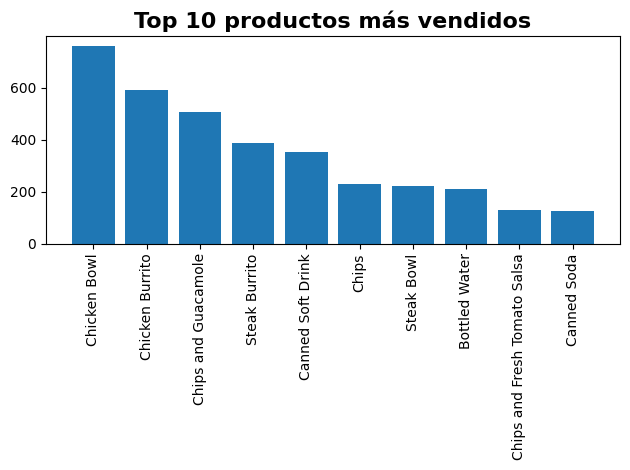

In [16]:
top_ten_pandas = top_ten.toPandas()


plt.bar(x=top_ten_pandas['item_name'], height=top_ten_pandas['cantidad_vendida'])
plt.xticks(rotation=90)
plt.title('Top 10 productos más vendidos', fontsize=16, fontweight='bold' )
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [24]:
chipo.show()

+--------+--------+--------------------+--------------------+----------+
|order_id|quantity|           item_name|  choice_description|item_price|
+--------+--------+--------------------+--------------------+----------+
|       1|       1|Chips and Fresh T...|                NULL|    $2.39 |
|       1|       1|                Izze|        [Clementine]|    $3.39 |
|       1|       1|    Nantucket Nectar|             [Apple]|    $3.39 |
|       1|       1|Chips and Tomatil...|                NULL|    $2.39 |
|       2|       2|        Chicken Bowl|[Tomatillo-Red Ch...|   $16.98 |
|       3|       1|        Chicken Bowl|[Fresh Tomato Sal...|   $10.98 |
|       3|       1|       Side of Chips|                NULL|    $1.69 |
|       4|       1|       Steak Burrito|[Tomatillo Red Ch...|   $11.75 |
|       4|       1|    Steak Soft Tacos|[Tomatillo Green ...|    $9.25 |
|       5|       1|       Steak Burrito|[Fresh Tomato Sal...|    $9.25 |
|       5|       1| Chips and Guacamole|           

In [26]:
total_items_per_order = chipo.groupBy(F.col('item_name')).agg(F.count('*').alias('total_items'))

In [28]:
chipo.groupBy(F.col('order_id')).agg(F.sum('item_price')).show()

+--------+---------------+
|order_id|sum(item_price)|
+--------+---------------+
|     296|           NULL|
|     467|           NULL|
|     675|           NULL|
|     691|           NULL|
|     829|           NULL|
|    1090|           NULL|
|    1159|           NULL|
|    1436|           NULL|
|    1512|           NULL|
|    1572|           NULL|
|     125|           NULL|
|     451|           NULL|
|     800|           NULL|
|     853|           NULL|
|     944|           NULL|
|    1372|           NULL|
|    1394|           NULL|
|    1669|           NULL|
|     666|           NULL|
|     870|           NULL|
+--------+---------------+
only showing top 20 rows



In [29]:
chipo.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- quantity: string (nullable = true)
 |-- item_name: string (nullable = true)
 |-- choice_description: string (nullable = true)
 |-- item_price: string (nullable = true)



In [ ]:
chipo.select(F.col('item_price')).show(5)

+----------+
|item_price|
+----------+
|    $2.39 |
|    $3.39 |
|    $3.39 |
|    $2.39 |
|   $16.98 |
+----------+
only showing top 5 rows



In [51]:
chipo = chipo.withColumn('item_price', F.regexp_replace('item_price', '\$', '').cast(T.FloatType()))
chipo.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- quantity: string (nullable = true)
 |-- item_name: string (nullable = true)
 |-- choice_description: string (nullable = true)
 |-- item_price: float (nullable = true)



In [53]:
chipo.groupBy(F.col('order_id')).agg(F.count('*').alias('total_articulos'),
                                     F.sum('item_price').alias('Total_por_orden')).show(5)

+--------+---------------+---------------+
|order_id|total_articulos|Total_por_orden|
+--------+---------------+---------------+
|     296|              2|            9.0|
|     467|              3|           26.0|
|     675|              2|           18.0|
|     691|             11|          113.0|
|     829|              3|           11.0|
+--------+---------------+---------------+
only showing top 5 rows



In [54]:
df_respuesta = chipo.groupBy(F.col('order_id')).agg(F.count('*').alias('total_articulos'),
                                     F.sum('item_price').alias('Total_por_orden')).toPandas()

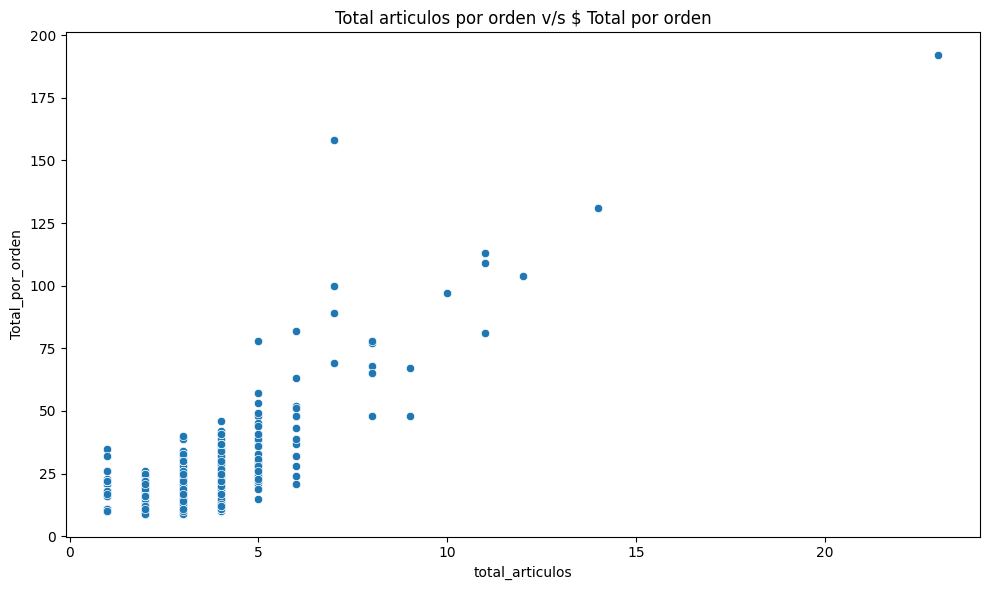

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_articulos', y='Total_por_orden', data=df_respuesta)
plt.title('Total articulos por orden v/s $ Total por orden')
plt.tight_layout()
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.